<a href="https://colab.research.google.com/github/andres-merino/AprendizajeAutomaticoInicial-05-N0105/blob/main/2-Notebooks/09-Agrupamiento-kMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table style="border: none; border-collapse: collapse;">
    <tr>
        <td style="width: 20%; vertical-align: middle; padding-right: 10px;">
            <img src="https://i.imgur.com/nt7hloA.png" width="100">
        </td>
        <td style="width: 2px; text-align: center;">
            <font color="#0030A1" size="7">|</font><br>
            <font color="#0030A1" size="7">|</font>
        </td>
        <td>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="5">
                <b>Facultad de Ciencias Exactas, Naturales y Ambientales</b>
            </font> </p>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="4">
                Aprendizaje Automático Inicial &bull; Agrupamiento k-Means
            </font></p>
            <p style="font-style: oblique;"><font color="#0030A1" size="3">
                Andrés Merino &bull; Periodo 2025-02
            </font></p>
        </td>  
    </tr>
</table>

---
## <font color='264CC7'> Introducción </font>

Este notebook está diseñado como una guía introductoria para implementar el algoritmo de agrupamiento K-means en Python.


Los paquetes necesarios son:

In [1]:
import pandas as pd  # Manejo de datos
import numpy as np  # Operaciones matemáticas y arreglos
import matplotlib.pyplot as plt  # Visualización
import plotly.express as px # Para visualización interactiva

from sklearn.preprocessing import StandardScaler  # Estandarización de datos

from sklearn.datasets import make_blobs # Creación de datos de prueba
from sklearn.cluster import KMeans  # Algoritmo K-means
from sklearn.decomposition import PCA # Análisis de componentes principales

---
## <font color='264CC7'> Ejemplo </font>

En el siguiente código, se agrupan datos generados artificialmente en cuatro grupos utilizando el algoritmo K-means.  Se muestran los resultados mediante un gráfico de dispersión, destacando los centroides de los grupos.

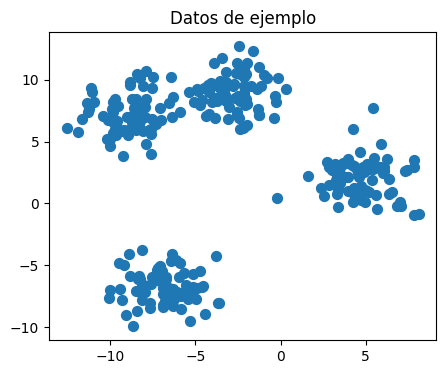

In [2]:
# Generar datos de ejemplo
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=1.5, random_state=42)

# Visualizar los datos
plt.figure(figsize=(5, 4))
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title('Datos de ejemplo')
plt.show()

El código para generar el agrupamiento es el siguiente:

In [3]:
# Implementación de K-means
modelo = KMeans(n_clusters=4, random_state=42)
modelo.fit(X)
labels = modelo.labels_
print(labels)

[3 3 0 1 3 1 2 1 0 2 0 2 0 0 3 0 3 2 0 0 2 0 1 3 0 3 3 1 1 2 0 2 3 2 3 0 3
 1 3 1 2 0 3 1 0 0 3 2 3 2 1 3 1 0 1 2 3 2 2 0 3 2 2 0 1 1 1 1 1 0 1 1 3 2
 0 3 1 1 0 1 0 0 3 0 1 3 3 2 2 2 3 0 3 0 0 3 1 0 3 3 2 2 2 0 0 0 0 0 1 3 2
 0 0 0 0 2 3 1 3 1 1 1 0 3 1 3 3 0 3 1 2 0 0 0 0 2 2 3 0 1 0 2 1 0 2 2 2 2
 1 0 0 3 2 1 0 2 1 3 3 2 0 3 1 3 2 3 1 0 0 0 0 0 1 2 2 1 1 2 2 1 3 0 3 2 2
 3 1 0 2 2 1 1 1 3 2 1 1 2 2 3 0 0 1 2 0 1 1 3 1 0 0 1 1 2 3 1 3 3 0 3 3 1
 3 1 2 2 3 3 2 2 2 3 0 1 2 1 3 2 3 3 3 1 1 2 3 1 1 1 3 1 3 1 3 2 1 3 2 0 3
 0 2 0 3 0 1 2 1 2 2 0 0 1 2 2 3 3 1 0 0 2 2 2 2 1 3 2 1 2 2 1 0 1 2 0 3 0
 2 0 3 3]


Revisemos el resultado de la ejecución del código:

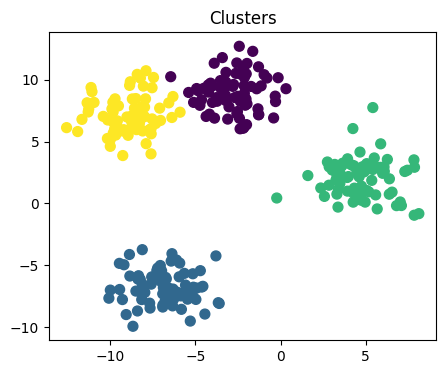

In [4]:
# Visualizar los clusters
plt.figure(figsize=(5, 4))
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50)
plt.title('Clusters')
plt.show()

Podemos obtener los centroides de los grupos con el siguiente código:

In [5]:
# Centroides
centroids = modelo.cluster_centers_
print(centroids)

[[-2.76847921  8.96113041]
 [-6.80871448 -6.80563143]
 [ 4.75736792  2.07611029]
 [-8.8911944   7.10011368]]


Agreguemos los centroides al gráfico de dispersión:

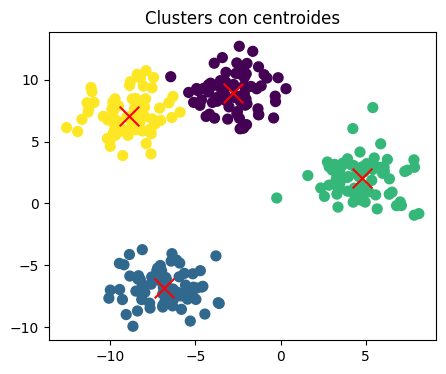

In [6]:
# Gráfico con centroides
plt.figure(figsize=(5, 4))
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='x')
plt.title('Clusters con centroides')
plt.show()

Podemos calcular la inercia de los grupos con el siguiente código:

In [7]:
# Inercia
modelo.inertia_

1251.3526298707468

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Utilizar k = 3 y comparar el resultado con k = 4.
</div>
</br>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Cambiar el método de inicialización a `'random'` y observar los efectos en la convergencia. Revisa la documentación de la función `KMeans` para obtener más información sobre este y otros parámetros.
</div>

### <font color='264CC7'> Método del codo </font>

Para seleccionar el número de clusters, se puede utilizar el método del codo. Este método consiste en graficar la suma de las distancias al cuadrado de cada punto al centroide más cercano en función del número de clusters. El punto en el que la pendiente de la curva disminuye drásticamente se considera el número óptimo de clusters.

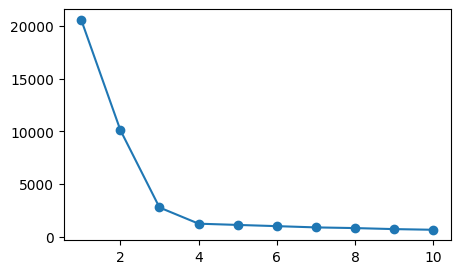

In [8]:
# Metodo del codo
inertia = []
for i in range(1, 11):
    modelo = KMeans(n_clusters=i, random_state=42)
    modelo.fit(X)
    inertia.append(modelo.inertia_)
plt.figure(figsize=(5, 3))
plt.plot(range(1, 11), inertia, marker='o')
 

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Realiza el agrupamiento con el número de clusters que consideres óptimo con la gráfica del método del codo.
</div>

---
## <font color='264CC7'> Ejemplo práctico </font>


### <font color='264CC7'> Preprocesamiento de datos </font>

Primero leamos los datos y seleccionemos las columnas que utilizaremos:

In [9]:
# Leer los datos
data = pd.read_csv('https://raw.githubusercontent.com/andres-merino/AprendizajeAutomaticoInicial-05-N0105/refs/heads/main/2-Notebooks/datos/Pokemon.csv')
# Tomo las columnas de interés
numeric_cols = ['Attack', 'Defense', 'Speed', 'Sp. Atk', 'Sp. Def', 'HP']
data = data[['Name', *numeric_cols]]
# Muestro los primeros registros
display(data.head())

,Name,Attack,Defense,Speed,Sp. Atk,Sp. Def,HP
0,Bulbasaur,49,49,45,65,65,45
1,Ivysaur,62,63,60,80,80,60
2,Venusaur,82,83,80,100,100,80
3,Charmander,52,43,65,60,50,39
4,Charmeleon,64,58,80,80,65,58


Revisemos los datos:

In [10]:
data.describe()

,Attack,Defense,Speed,Sp. Atk,Sp. Def,HP
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,72.549669,68.225166,68.933775,67.139073,66.019868,64.211921
std,26.596162,26.916704,26.746880,28.534199,24.197926,28.590117
min,5.000000,5.000000,15.000000,15.000000,20.000000,10.000000
25%,51.000000,50.000000,46.500000,45.000000,49.000000,45.000000
50%,70.000000,65.000000,70.000000,65.000000,65.000000,60.000000
75%,90.000000,84.000000,90.000000,87.500000,80.000000,80.000000
max,134.000000,180.000000,140.000000,154.000000,125.000000,250.000000


Escalemos los datos:

In [11]:
# Escalar los datos
scaler = StandardScaler()
X = scaler.fit_transform(data.iloc[:, 1:])

### <font color='264CC7'> Determinación del número de clusters </font>

Realicemos el método del codo para determinar el número de clusters óptimo:

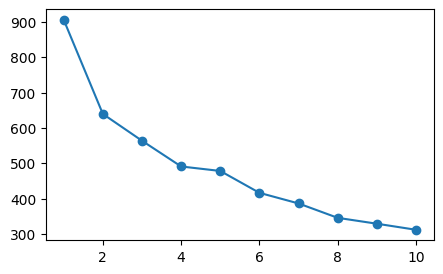

In [12]:
# Metodo del codo
inertia = []
for i in range(1, 11):
    modelo = KMeans(n_clusters=i, random_state=42)
    modelo.fit(X)
    inertia.append(modelo.inertia_)
plt.figure(figsize=(5, 3))
plt.plot(range(1, 11), inertia, marker='o')

El número óptimo de clusters parece ser 4 o 6. Utilicemos 6 clusters para el agrupamiento.

### <font color='264CC7'> k-Means </font>

Generamos el agrupamiento:

In [13]:
# Realizamos el agrupamiento
modelo = KMeans(n_clusters=6, random_state=42)
modelo.fit(X)

# Asignamos las etiquetas
labels = modelo.labels_

# Agregar la información de clúster como C1, C2, C3, etc.
data['Cluster'] = ['C' + str(c) for c in labels]

# Revisar los primeros registros
display(data.head())

,Name,Attack,Defense,Speed,Sp. Atk,Sp. Def,HP,Cluster
0,Bulbasaur,49,49,45,65,65,45,C1
1,Ivysaur,62,63,60,80,80,60,C1
2,Venusaur,82,83,80,100,100,80,C2
3,Charmander,52,43,65,60,50,39,C3
4,Charmeleon,64,58,80,80,65,58,C0


### <font color='264CC7'> Análisis de clústers </font>

Revisemos la cantidad de cada cluster:

In [14]:
# Cantidades de elementos por clúster
data['Cluster'].value_counts()

Cluster
C1    37
C3    34
C2    31
C0    22
C4    22
C5     5
Name: count, dtype: int64

Podemos analizar las características de cada cluster:

In [15]:
# Podemos ver las medias de cada clúster
data.groupby('Cluster')[numeric_cols].mean()


,Attack,Defense,Speed,Sp. Atk,Sp. Def,HP
Cluster,,,,,,
C0,90.727273,65.863636,94.272727,57.545455,74.318182,65.318182
C1,65.378378,76.324324,42.000000,55.432432,55.162162,55.972973
C2,99.709677,95.290323,68.612903,83.161290,83.225806,84.064516
C3,48.647059,42.500000,64.882353,46.294118,43.323529,40.147059
C4,68.181818,65.227273,101.727273,105.863636,84.318182,64.636364
C5,59.000000,39.000000,42.000000,68.000000,77.000000,159.000000


Revisemos los cinco primeros elementos de cada cluster:

In [16]:
# Mostremos los nombres de 5 pokemones de cada clúster
for cluster in data['Cluster'].unique():
    print(f'Cluster {cluster}: cantidad de elementos {data[data["Cluster"] == cluster].shape[0]}')
    display(data[data['Cluster'] == cluster].head(5))

Cluster C1: cantidad de elementos 37


,Name,Attack,Defense,Speed,Sp. Atk,Sp. Def,HP,Cluster
0,Bulbasaur,49,49,45,65,65,45,C1
1,Ivysaur,62,63,60,80,80,60,C1
6,Squirtle,48,65,43,50,64,44,C1
7,Wartortle,63,80,58,65,80,59,C1
26,Sandshrew,75,85,40,20,30,50,C1


Cluster C2: cantidad de elementos 31


,Name,Attack,Defense,Speed,Sp. Atk,Sp. Def,HP,Cluster
2,Venusaur,82,83,80,100,100,80,C2
8,Blastoise,83,100,78,85,105,79,C2
27,Sandslash,100,110,65,45,55,75,C2
30,Nidoqueen,92,87,76,75,85,90,C2
33,Nidoking,102,77,85,85,75,81,C2


Cluster C3: cantidad de elementos 34


,Name,Attack,Defense,Speed,Sp. Atk,Sp. Def,HP,Cluster
3,Charmander,52,43,65,60,50,39,C3
9,Caterpie,30,35,45,20,20,45,C3
10,Metapod,20,55,30,25,25,50,C3
12,Weedle,35,30,50,20,20,40,C3
13,Kakuna,25,50,35,25,25,45,C3


Cluster C0: cantidad de elementos 22


,Name,Attack,Defense,Speed,Sp. Atk,Sp. Def,HP,Cluster
4,Charmeleon,64,58,80,80,65,58,C0
14,Beedrill,90,40,75,45,80,65,C0
17,Pidgeot,80,75,101,70,70,83,C0
19,Raticate,81,60,97,50,70,55,C0
21,Fearow,90,65,100,61,61,65,C0


Cluster C4: cantidad de elementos 22


,Name,Attack,Defense,Speed,Sp. Atk,Sp. Def,HP,Cluster
5,Charizard,84,78,100,109,85,78,C4
11,Butterfree,45,50,70,90,80,60,C4
25,Raichu,90,55,110,90,80,60,C4
37,Ninetales,76,75,100,81,100,73,C4
48,Venomoth,65,60,90,90,75,70,C4


Cluster C5: cantidad de elementos 5


,Name,Attack,Defense,Speed,Sp. Atk,Sp. Def,HP,Cluster
38,Jigglypuff,45,20,20,45,25,115,C5
39,Wigglytuff,70,45,45,85,50,140,C5
112,Chansey,5,5,50,35,105,250,C5
133,Vaporeon,65,60,65,110,95,130,C5
142,Snorlax,110,65,30,65,110,160,C5


### <font color='264CC7'> Visualizaciones  </font>

In [17]:
# Realizo un PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Crear un DataFrame para graficar fácilmente
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['Name'] = data['Name'].values
df_pca['Cluster'] = data['Cluster'].values

# Crear el scatterplot interactivo con Plotly Express
fig = px.scatter(
    df_pca, 
    x='PC1', 
    y='PC2', 
    color='Cluster',
    hover_data=['Name'],  # Mostrará 'Name'
)

# Personalizar apariencia
fig.update_traces(marker=dict(opacity=0.8))
fig.update_layout(
    title='Clústeres visualizados en 2D (PCA)',
    width=800,
    height=600,
)

fig.show()

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Genera el agrupamiento con otro número de clusters que consideraste óptimo.
</div>